Introdução
No presente trabalho vamos fazer um breve tratamento dos dados coletados do acidente com o navio Titanic ocorrido em meados do ano de 1912.
Para fazer os tratamentos dos dados, foram ultizadas as bibliotecas Numpy e Pandas e por meio da leitura dos dados diposbinilizados de um arquivo csv exibimos gráficos criados pela biblioteca Matplotlib visando melhor compreensão dos fatos.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("titanic.csv")

In [3]:
traducoes = {
    'PassengerId': 'IdPassageiro',
    'Survived': 'Sobreviveu', # 0 = Não, 1 = Sim
    'Pclass': 'Classe', # 1, 2, 3
    'Name': 'Nome',
    'Sex': 'Gênero',
    'Age': 'Idade',
    'SibSp': 'NumeroIrmaos',
    'Parch':  'NumeroPais',
    'Ticket': 'NumeroTicket',
    'Fare': 'PrecoTicket',
    'Cabin' : 'NumeroCabine',
    'Embarked': 'PortoEmbarcacao' # C = Cherbourg, Q = Queenstown, S = Southampton
}

# result = [(d['color'], d['value']) for d in dictionarylist]

novas_colunas = []
for chave, valor in traducoes.items():
    novas_colunas.append(valor)

print(novas_colunas)

['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Gênero', 'Idade', 'NumeroIrmaos', 'NumeroPais', 'NumeroTicket', 'PrecoTicket', 'NumeroCabine', 'PortoEmbarcacao']


In [4]:
df.columns = novas_colunas
df

,IdPassageiro,Sobreviveu,Classe,Nome,Gênero,Idade,NumeroIrmaos,NumeroPais,NumeroTicket,PrecoTicket,NumeroCabine,PortoEmbarcacao
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#agrupando os dados
agrupando_genero = df.groupby('Gênero')
contagem_passageiros = agrupando_genero['IdPassageiro'].count()

print("Contagem de passageiros")
print(contagem_passageiros)

Contagem de passageiros
Gênero
female    314
male      577
Name: IdPassageiro, dtype: int64


In [6]:
#calculando média de idade por Genero
media_idade = agrupando_genero['Idade'].mean()

print("Média de Idade de passageiros por gênero")
print(media_idade)

Média de Idade de passageiros por gênero
Gênero
female    27.915709
male      30.726645
Name: Idade, dtype: float64


In [7]:
#calculando valor max e min pago por Genero
valor_max = agrupando_genero['PrecoTicket'].max()
valor_min = agrupando_genero['PrecoTicket'].min()


print(f'Valor mínimo do preço da passagem por gênero {valor_min}, {valor_max}')


Valor mínimo do preço da passagem por gênero Gênero
female    6.75
male      0.00
Name: PrecoTicket, dtype: float64, Gênero
female    512.3292
male      512.3292
Name: PrecoTicket, dtype: float64


Plotando Gráficos


<Axes: xlabel='Gênero'>

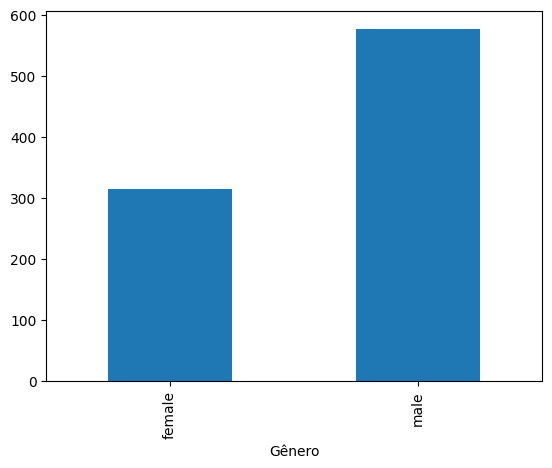

In [8]:
import matplotlib.pyplot as plt
valor_max = df['Gênero'].value_counts()
contagem_passageiros.plot(kind='bar')

Text(0.5, 1.0, 'Distribuição de Idades')

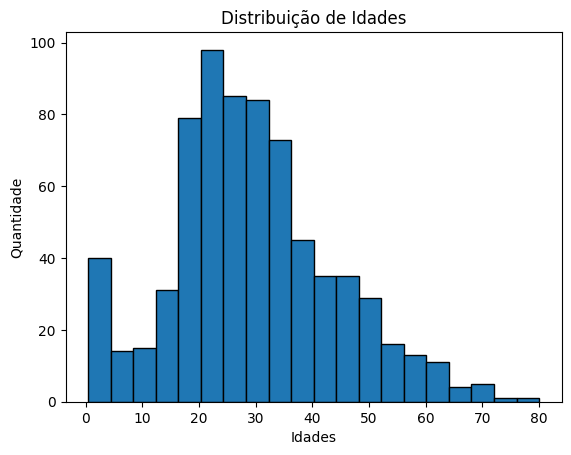

In [9]:
df['Idade'].plot.hist(bins=20, edgecolor='black')

plt.xlabel('Idades')
plt.ylabel('Quantidade')
plt.title('Distribuição de Idades')

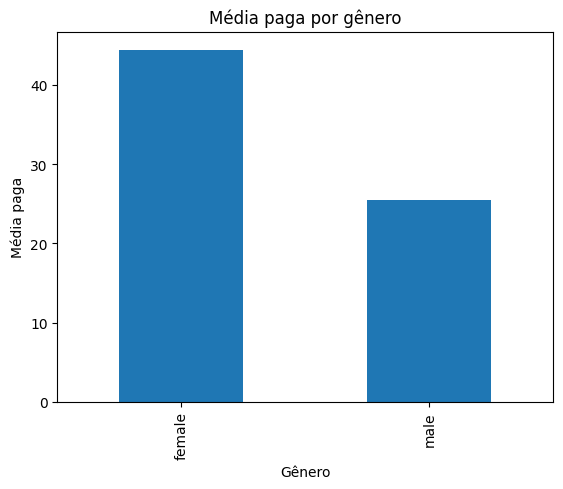

In [10]:
taxa_sob_sexo = df.groupby('Gênero')['PrecoTicket'].mean()
taxa_sob_sexo.plot.bar()

plt.xlabel('Gênero')
plt.ylabel('Média paga')
plt.title('Média paga por gênero')
 
plt.show()

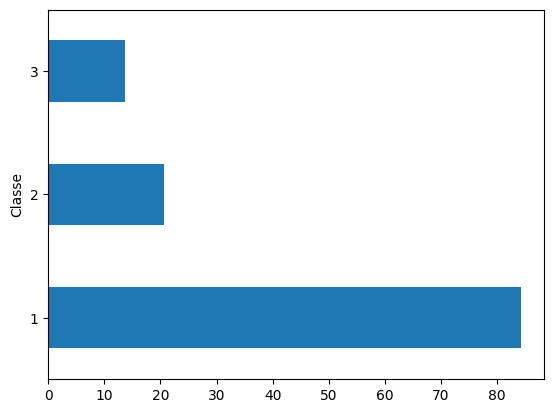

In [11]:
taxa_sob_classe = df.groupby('Classe')["PrecoTicket"].mean()
taxa_sob_classe.plot.barh()

plt.title = ("Valor Médio pago por classe")
plt.xlabel= ("classe")
plt.ylabel= ("Arrecadação por cor")


plt.show()

Insigths: No insigths pra essas semanas.